PARCIAL N.1 MÉTODOS COMPUTACIONALES/ ANGELICA VANEGAS GARCIA/ 1000290572

In [1]:
import matplotlib.pyplot as plt
from scipy import optimize
import scipy as sp
import numpy as np
import pandas as pd

In [51]:
#@title 1. Primer punto: Definimos las condiciones iniciales

m = 0.25
s_0 = 900
k = 0.148
g = 9.8

parametros = (m , s_0, k, g)

In [52]:
#@title a. Definimos la función

def caida(t, m, s_0, k, g):
  s = (s_0 - ((m*g*t)/(k)) + ((((m**2)*g)*(1-(np.exp((-k*t)/t))))/k**2))

  return s

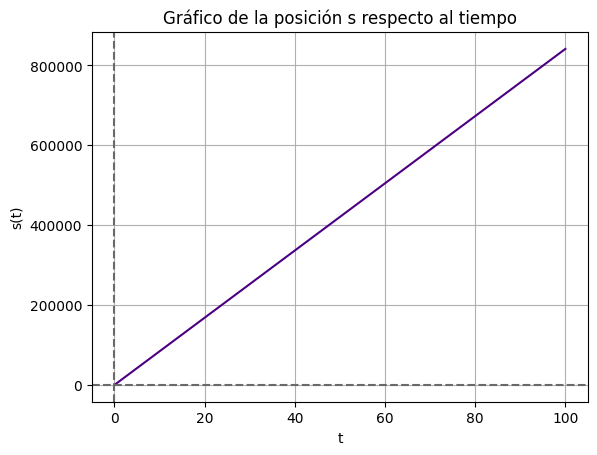

In [4]:
#@title Creamos un linspace para visualizar la función y graficamos

t_0 = np.linspace(0, 100, 100)
y = caida(*parametros, t_0)

plt.plot(t_0, y, color = "indigo")
plt.title("Gráfico de la posición s respecto al tiempo")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.grid()
plt.show()


In [5]:
#@title b. Vamos a utilizar tres métodos para determinar el tiempo de vuelo, primero defino la derivada y luego la funcion g que seria la resta entre la funcion t y nuestra función


def derivada(t, m, s_0, k, g):

  ds = (- ((m * g)/(k)) - (((m*g*t)*np.exp((-k*t)/(m)))/k))

  return ds

In [6]:

def g(t, m, s_0, k, g):

  g = t - (s_0 - ((m * g * t)/(k)) + ((((m**2)*g)*(1-(np.exp((-k*t)/t))))/k**2))

  return g

In [7]:
#@title método de newton

raiz1 = optimize.newton(caida, 60, derivada, args = parametros)
print(raiz1)

54.59972681218421


In [8]:
#@title método de la secante

raiz2 = optimize. newton(caida, 60, args = parametros)
print(raiz2)

54.599726812184215


In [9]:
#@title método del punto fijo

raiz3 = optimize.fixed_point(g, 60, args = parametros)
print(raiz3)

54.599726812184215


Como vemos los tres métodos coinciden en el valor

<ipython-input-3-0a2dc032bdf3>:4: RuntimeWarning: invalid value encountered in divide
  s = (s_0 - ((m*g*t)/(k)) + ((((m**2)*g)*(1-(np.exp((-k*t)/t))))/k**2))


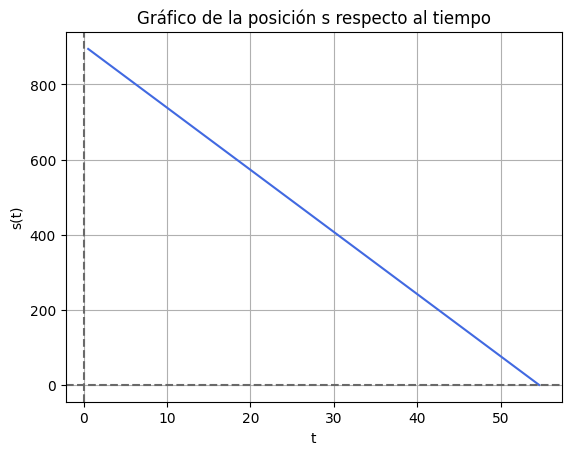

In [10]:
#@title Graficamos nuestra posición teniendo en cuenta el tiempo de vuelo

t = np.linspace(0, raiz1, 100)


plt.plot(t, caida(t, *parametros), color = "royalblue")
plt.title("Gráfico de la posición s respecto al tiempo")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.grid()
plt.show()


<ipython-input-52-0a2dc032bdf3>:4: RuntimeWarning: invalid value encountered in divide
  s = (s_0 - ((m*g*t)/(k)) + ((((m**2)*g)*(1-(np.exp((-k*t)/t))))/k**2))


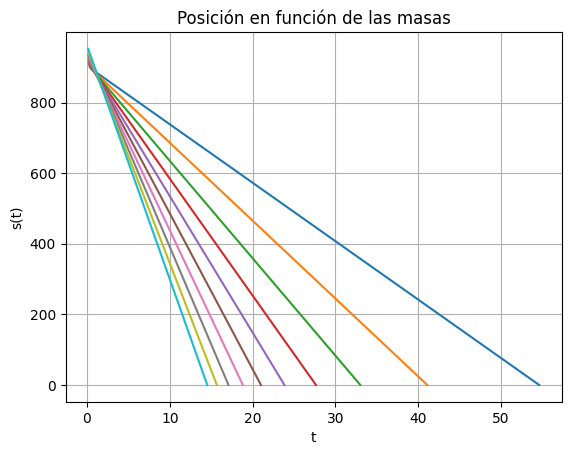

In [56]:
#@title c. Tiempo de vuelo para 10 valores de masa

masas = np.linspace(0.25, 1, 10)

for i in masas:
  tiempodevuelo = optimize.newton(caida, 200, derivada, args = (i, s_0, k, g))
  t_nuevos = np.linspace(0, tiempodevuelo, 100)
  posicion = caida(t_nuevos, i, s_0, k, g)
  plt.plot(t_nuevos, posicion)

plt.title("Posición en función de las masas")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.grid()
plt.show()



In [14]:
#@title 2. Segundo punto. a. Leer el data set

url = "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/Weather%20Data.csv"

df = pd.read_csv(url)
df


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [24]:
#@title b. lista las columas como una lista
columnas = df.head(0)
columnas
l = []
for i in columnas:
  l.append(i)

print(l)

['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']


In [29]:
#@title c. elementos de la columna Weather

weather = df["Weather"]
print(weather)

0                        Fog
1                        Fog
2       Freezing Drizzle,Fog
3       Freezing Drizzle,Fog
4                        Fog
                ...         
8779                    Snow
8780                    Snow
8781                    Snow
8782                    Snow
8783                    Snow
Name: Weather, Length: 8784, dtype: object


In [30]:
#@title d. Filtro de los valores "cloudy" para "weather"
valor = df[df["Weather"] == "Cloudy"]
print(valor)

            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
17     1/1/2012 17:00     3.0               0.0         81               13   
20     1/1/2012 20:00     3.2               1.3         87               19   
21     1/1/2012 21:00     4.0               1.7         85               20   
23     1/1/2012 23:00     5.3               2.0         79               30   
25      1/2/2012 1:00     4.6               0.0         72               39   
...               ...     ...               ...        ...              ...   
8761  12/31/2012 1:00   -10.7             -14.0         77               15   
8762  12/31/2012 2:00   -10.1             -13.4         77                9   
8764  12/31/2012 4:00   -10.5             -12.8         83               11   
8765  12/31/2012 5:00   -10.2             -12.4         84                6   
8766  12/31/2012 6:00    -9.7             -11.7         85                4   

      Visibility_km  Press_kPa Weather  
17        

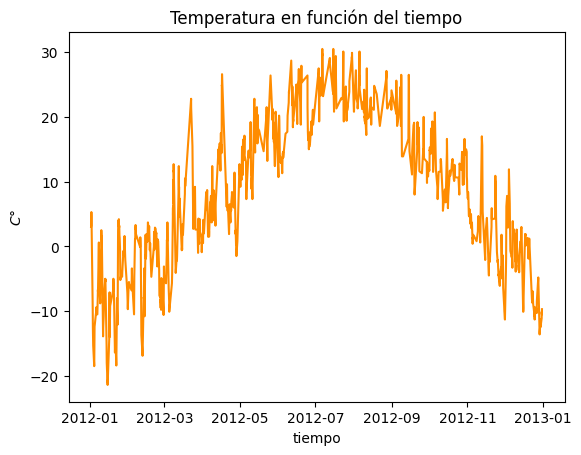

In [49]:
#@title e. gráfica en función del tiempo para la temperatura

tiempo = df["Time"]=pd.to_datetime(df["Date/Time"], format='%m/%d/%Y %H:%M')
tiempovalor = tiempo[df["Weather"] == "Cloudy"]

plt.plot(tiempovalor, valor["Temp_C"], color = "darkorange")
plt.title("Temperatura en función del tiempo")
plt.ylabel("$C°$")
plt.xlabel("tiempo")
plt.show()

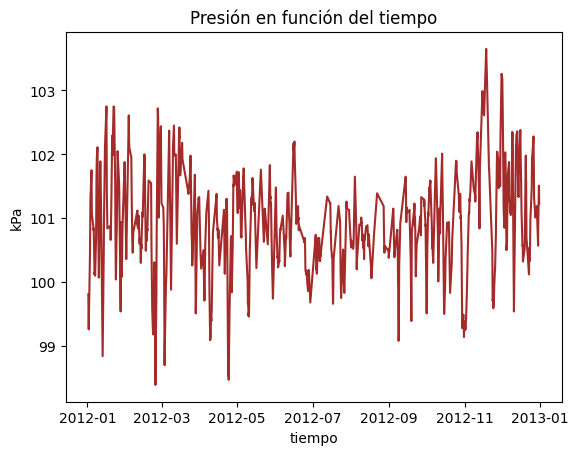

In [47]:
#@title Gráfica en función del tiempo para la presión

plt.plot(tiempovalor, valor["Press_kPa"], color = "brown")
plt.title("Presión en función del tiempo")
plt.ylabel("kPa")
plt.xlabel("tiempo")
plt.show()